In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Read Data from the File 
df=pd.read_csv('healthcare_test_data.csv')

# Drop na Values & Reduce Dataset to first 150 Rows
df=df.dropna()[:150]

#Init Label Encoder & Fit & Transofrm X & Y Variables
le = LabelEncoder()
Y = le.fit_transform(df['Severity of Illness'])
df2=df.filter(items=['Type of Admission','Age'])
df2['Type of Admission'] = le.fit_transform(df2['Type of Admission'])
df2['Age'] = le.fit_transform(df2['Age'])
X=df2

In [3]:
#Split Dataset into Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)

# Create A Decision Tree Classifier, Predict & generate a Classification Report
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       1.00      0.40      0.57         5
           2       0.67      0.78      0.72        18

    accuracy                           0.63        30
   macro avg       0.70      0.54      0.57        30
weighted avg       0.67      0.63      0.63        30



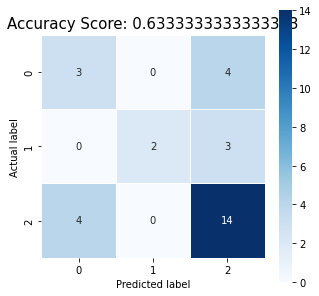

In [4]:
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()

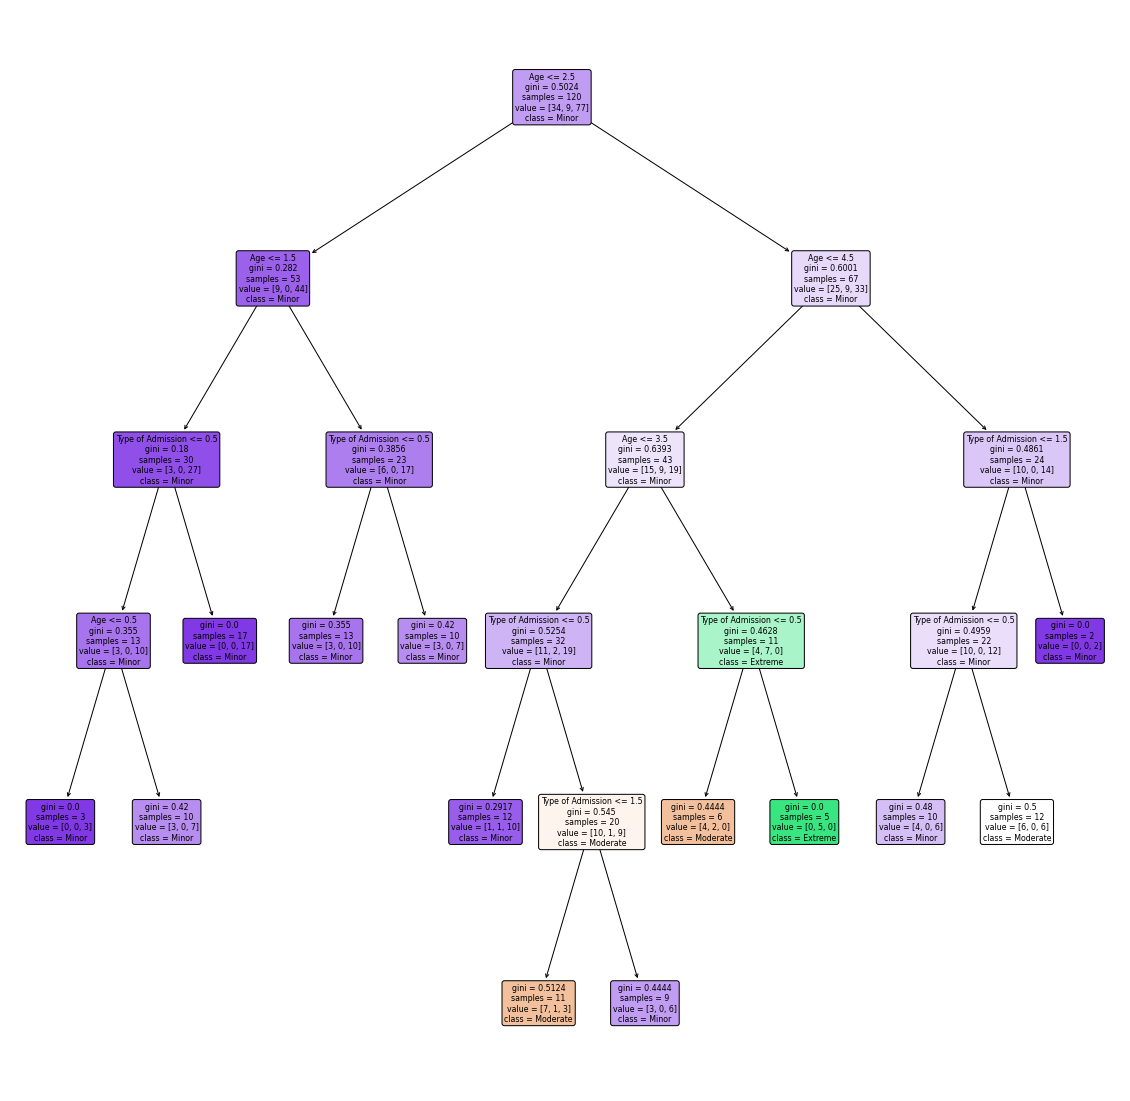

In [5]:
# plot The Decision Tree
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df2.columns, class_names =["Moderate","Extreme","Minor"] , filled = True , precision = 4, rounded = True)
plt.show()